# Count Vectorizer

Goal: Create an algo that computes vectors of counts of words for texts.

In [119]:
import numpy  as np
import scipy as sp
import pandas as pd
from sklearn.cluster import kmeans_plusplus
import glob

Get full vocabulary size from dataset

In [120]:
vocab = set()

def getTextVocabulary(filepath, vocab):
   vect = dict()
   with open(filepath) as file:
      for line in file:
         for word in line.lower().translate({ord(i): None for i in '.?!-,"()'}).split():
            if word in vect:
               vect[word]+=1
            else:
               vect[word]=1
   return vocab.union({*vect.keys()})

filepaths = glob.glob("../datasets/bbc/*/*.txt")
dataset_size = len(filepaths)

for file in filepaths:
   try:
      vocab = getTextVocabulary(file,vocab)
   except Exception:
      print(file)
      print(Exception)
   
vocab

../datasets/bbc/sport/199.txt
<class 'Exception'>


{'airliner',
 'ellman',
 'daley',
 'challenger',
 'supports',
 '2628',
 "snow's",
 '51yearold',
 'efforts',
 '6600',
 'convert',
 'damming',
 "child's",
 'competitve',
 'near',
 'pitt',
 'henri',
 'spends',
 'blewitt',
 'cameroon',
 'hybrid',
 'easterby;',
 'algorithm',
 'andrew',
 'honestly',
 '$151m',
 'grab',
 'heir',
 'traviata',
 'toppling',
 'lovers',
 'intentions',
 'dimech',
 'interpreting',
 'seemed',
 'handcuffed',
 '£27473m',
 "offer'",
 'rockwool',
 'carries',
 'deficit',
 'vpcc4',
 'oil',
 'grants',
 'interactivity',
 'us$370m',
 'penalty',
 'nutritional',
 '1723',
 'clad',
 'viticulture',
 'yukos',
 'licences',
 'tours',
 'bbc',
 'sibneft',
 '51%',
 'flyhalf',
 '2101',
 'walker',
 'mbabane',
 'fm',
 'rossi',
 'rebound',
 'takeaway',
 'buyer',
 'relying',
 'quarrying',
 "jacob's",
 'highestcharting',
 'heroics',
 'camille',
 'thayer',
 'antiques',
 'arrangements',
 'coincided',
 'schwarzenegger',
 '311764',
 'inflated',
 'carter',
 "competitors'",
 'spikey',
 'hots',
 'pre

Then compute vectors for each text

In [89]:
vocabList = list(vocab)
vocabulary_size = len(vocabList)
print("vocab size: ", vocabulary_size)

def getTextVector(filepath):
  textVect = np.zeros((vocabulary_size,1))
  with open(filepath) as file:
      for line in file:
        for word in line.lower().translate({ord(i): None for i in '.?!-,"()'}).split():
          textVect[vocabList.index(word),0]+=1
  # normalize vector
  textVect = textVect/np.sum(textVect)
  return textVect

#initialization
X = getTextVector(filepaths[0])
print("single vector shape: ", X.shape) 
print(X)

for filepath in filepaths[1:]:
   try:
      X = np.c_[X, getTextVector(filepath)]
   except Exception:
      print(Exception)
  

X.shape

vocab size:  37124
single vector shape:  (37124, 1)
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
<class 'Exception'>


(37124, 2224)

In [94]:
# Calculate seeds from k-means++
centers_init, indices = kmeans_plusplus(X.T, n_clusters=5, random_state=0)

In [95]:
print(indices)
print(centers_init.shape)

[1653 1853  787  112 1744]
(5, 37124)


Computing distance between K-centers and texts

In [96]:
V_sport = getTextVector("../datasets/bbc/sport/001.txt")
V_business = getTextVector("../datasets/bbc/business/001.txt")
V_entertainment = getTextVector("../datasets/bbc/entertainment/001.txt")
V_politics = getTextVector("../datasets/bbc/politics/001.txt")
V_tech = getTextVector("../datasets/bbc/tech/001.txt")


In [98]:
def vector_distance(v1, v2):
    return np.sqrt(np.sum(np.square(v1 - v2)))

for i in range(5):
    print(vector_distance(V_sport, centers_init[i,:]))

31.648981274266795
29.99181733299662
32.14846102245641
32.37248943908978
32.321061723628375


Print the N most common words from the clusters

In [112]:
N = 30
ind_0 = np.argpartition(centers_init[4,:], -N)[-N:]

for i in range(N):
    print(vocabList[ind_0[i]])


### Results
# Cluster 5 seems to be politics
# Cluster 3 seems to be business
# Cluster 2 seems to tech
#

each
that
same
also
civil
as
agendas
chancellor
are
a
were
baume
government
in
blair
he
prime
minister
union
not
brown
on
said
was
and
the
of
between
mr
to


## Let's do it with sklearn now

In [135]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [159]:
vectorizer = CountVectorizer(input='filename', max_features=1000, lowercase=True, stop_words='english')
X_sklearn = vectorizer.fit_transform(filepaths)

In [160]:
print(X_sklearn.toarray())
print(X_sklearn.shape)

[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(2225, 1000)


In [161]:
# Calculate seeds from k-means++
centers_init_sklearn, indices_sklearn = kmeans_plusplus(X_sklearn.toarray(), n_clusters=5, random_state=0)

Apply PCA on K-means centers and dataset X in order to plot everything in 2d.

In [162]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_sklearn.toarray())
centers_init_sklearn_2d = pca.fit_transform(centers_init_sklearn)

In [163]:
print(X_2d.shape, centers_init_sklearn_2d.shape)

(2225, 2) (5, 2)


Let's plot everything now!

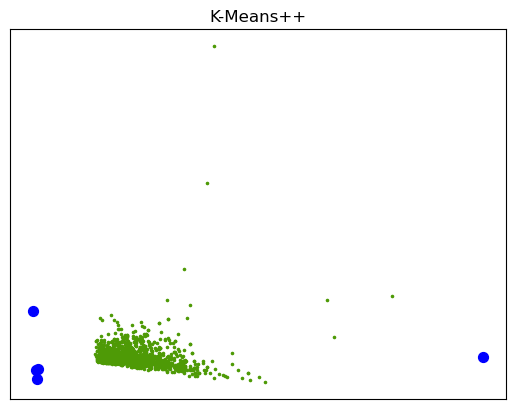

In [164]:
# Plot init seeds along side sample data
plt.figure(1)

#for k, col in enumerate(colors):
plt.scatter(X_2d[:, 0], X_2d[:, 1], c="#4E9A06", marker=".", s=10)

plt.scatter(centers_init_sklearn_2d[:, 0], centers_init_sklearn_2d[:, 1], c="b", s=50)
plt.title("K-Means++")
plt.xticks([])
plt.yticks([])
plt.show()

In [165]:
#Take a look at the most important words
vectorizer.get_feature_names_out()

array(['000', '10', '100', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '20', '200', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '22', '24', '25', '27', '28', '30', '40', '50', '500',
       '5bn', '60', 'ability', 'able', 'access', 'according', 'account',
       'accounts', 'accused', 'act', 'action', 'actor', 'actress',
       'actually', 'add', 'added', 'admitted', 'affected', 'africa',
       'age', 'agency', 'ago', 'agreed', 'agreement', 'ahead', 'aid',
       'air', 'airline', 'alan', 'album', 'allow', 'allowed', 'america',
       'american', 'analyst', 'analysts', 'andy', 'announced', 'annual',
       'anti', 'appeal', 'apple', 'approach', 'april', 'area', 'areas',
       'argued', 'arsenal', 'artists', 'asia', 'ask', 'asked',
       'association', 'asylum', 'athens', 'attack', 'attacks', 'attempt',
       'audience', 'australia', 'australian', 'authorities', 'available',
       'average', 'aviator', 'award', 'awards', 'away', 'backed', 'bad',


In [175]:
# let's take a look at the center's main words
KMeans_centers_words = vectorizer.inverse_transform(centers_init_sklearn)
print(KMeans_centers_words[0]) ## politics
print(KMeans_centers_words[1]) ## tech
print(KMeans_centers_words[2]) ## sports / entertainment ?
print(KMeans_centers_words[3]) ## business
print(KMeans_centers_words[4]) ## sports/entertainment?

['ban' 'blair' 'cabinet' 'chairman' 'committee' 'decided' 'election'
 'figure' 'foreign' 'given' 'government' 'held' 'huge' 'including' 'known'
 'labour' 'long' 'lords' 'minister' 'ministers' 'mp' 'mr' 'number'
 'opposition' 'party' 'period' 'personal' 'power' 'recent' 'said' 'shadow'
 'spokesman' 'stand' 'tony' 'trade' 'went' 'years']
['100' '17' '20' '200' '2006' '25' 'ability' 'age' 'ago' 'away' 'based'
 'bbc' 'big' 'book' 'chairman' 'children' 'china' 'chinese' 'claim'
 'computers' 'costs' 'countries' 'development' 'device' 'digital' 'doing'
 'education' 'end' 'expected' 'family' 'games' 'gave' 'getting' 'given'
 'going' 'home' 'idea' 'important' 'just' 'large' 'like' 'machine' 'make'
 'making' 'media' 'million' 'mobile' 'money' 'months' 'mr' 'need' 'number'
 'operating' 'order' 'pc' 'phones' 'plans' 'popular' 'probably' 'problems'
 'profit' 'programme' 'project' 'received' 'run' 'said' 'sale' 'says'
 'schools' 'second' 'seen' 'sell' 'service' 'set' 'speed' 'spend' 'state'
 'things

## Let's do it again but with Lemmatization!

In [206]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /Users/clement/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/clement/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/clement/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /Users/clement/nltk_data...


True

In [178]:
## download dataset again but in csv 
## !wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

--2023-04-30 10:58:18--  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 2606:4700:3031::6815:17d2, 2606:4700:3030::ac43:d5a6, 172.67.213.166, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|2606:4700:3031::6815:17d2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5085081 (4.8M) [text/csv]
Saving to: ‘bbc_text_cls.csv’

bbc_text_cls.csv    100%[===================>]   4.85M  7.22MB/s    in 0.7s    

2023-04-30 10:58:19 (7.22 MB/s) - ‘bbc_text_cls.csv’ saved [5085081/5085081]



In [179]:
df = pd.read_csv('../datasets/bbc/bbc_text_cls.csv')

In [180]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [181]:
inputs = df['text']
labels = df['labels']

<Axes: >

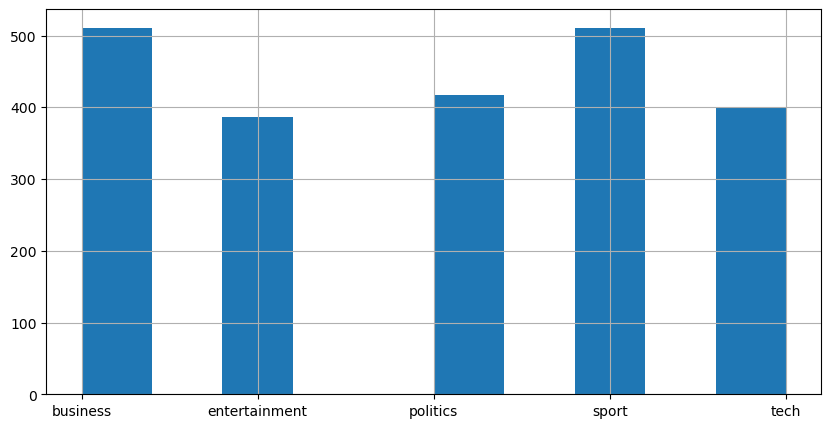

In [182]:
# Let's see if we have imbalanced classes
labels.hist(figsize=(10,5))

In [183]:
inputs_train, inputs_test, Ytrain, Ytest = train_test_split(inputs, labels, random_state=123)

In [194]:
vectorizer_v2 = CountVectorizer(stop_words='english')

In [195]:
Xtrain = vectorizer_v2.fit_transform(inputs_train)
# Do not fit on the test set! the vectorizer should only contain words found in the training set vocabulary.
Xtest = vectorizer_v2.transform(inputs_test)

In [196]:
Xtrain

<1668x25995 sparse matrix of type '<class 'numpy.int64'>'
	with 242123 stored elements in Compressed Sparse Row format>

Check with stop words and no lemmatization first

In [197]:
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print('train score: ', model.score(Xtrain, Ytrain))
print('test score: ', model.score(Xtest, Ytest))

train score:  0.9928057553956835
test score:  0.9766606822262118


Now let's do Lemmatization

In [203]:
def get_wordnet_pos(treebank_tag):
  if treebank_tag.startswith('J'):
    return wordnet.ADJ
  elif treebank_tag.startswith('V'):
    return wordnet.VERB
  elif treebank_tag.startswith('N'):
    return wordnet.NOUN
  elif treebank_tag.startswith('R'):
    return wordnet.ADV
  else:
    return wordnet.NOUN

In [204]:
class LemmaTokenizer:
  def __init__(self):
    self.wnl = WordNetLemmatizer()
  def __call__(self, doc):
    tokens = word_tokenize(doc)
    words_and_tags = nltk.pos_tag(tokens)
    return [self.wnl.lemmatize(word, pos=get_wordnet_pos(tag)) \
            for word, tag in words_and_tags]

In [214]:
# with lemmatization
vectorizer = CountVectorizer(tokenizer=LemmaTokenizer(), max_features=10000)
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
print(Xtrain.shape)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

/Users/clement/anaconda3/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(1668, 10000)
train score: 0.9928057553956835
test score: 0.9748653500897666


Now with stemming

In [211]:
class StemTokenizer:
  def __init__(self):
    self.porter = PorterStemmer()
  def __call__(self, doc):
    tokens = word_tokenize(doc)
    return [self.porter.stem(t) for t in tokens]

In [216]:
# with stemming
vectorizer = CountVectorizer(tokenizer=StemTokenizer(), max_features=10000)
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
print(Xtrain.shape)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

/Users/clement/anaconda3/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(1668, 10000)
train score: 0.9898081534772182
test score: 0.9748653500897666


The most simple solution, no lemmatization or stemming had the best score!